In [6]:
%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Change this path to your dataset's path in Google Drive
df = pd.read_csv("data_quality.csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,NH3,2.0,4.0,3.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,SO2,21.0,24.0,22.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",7/8/2024 11:00,14.675886,77.593027,PM10,58.0,92.0,71.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",7/8/2024 11:00,13.204880,79.097889,NO2,7.0,9.0,9.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",7/8/2024 11:00,14.465052,78.824187,PM10,NaN,NaN,NaN


In [8]:
dangerous_thresholds = {
    "NO2": 25,
    "CO": 10,
    "NH3": 80,
    "OZONE": 20,
    "PM10": 30,
    "PM2.5": 65,
    "SO2": 50
}

for index, row in df.iterrows():
    if not np.isnan(row["pollutant_avg"]):
        isAcceptable = "No"
        if row["pollutant_avg"] < dangerous_thresholds[row["pollutant_id"]]:
            isAcceptable = "Yes"
        df.at[index, 'isAcceptable'] = isAcceptable


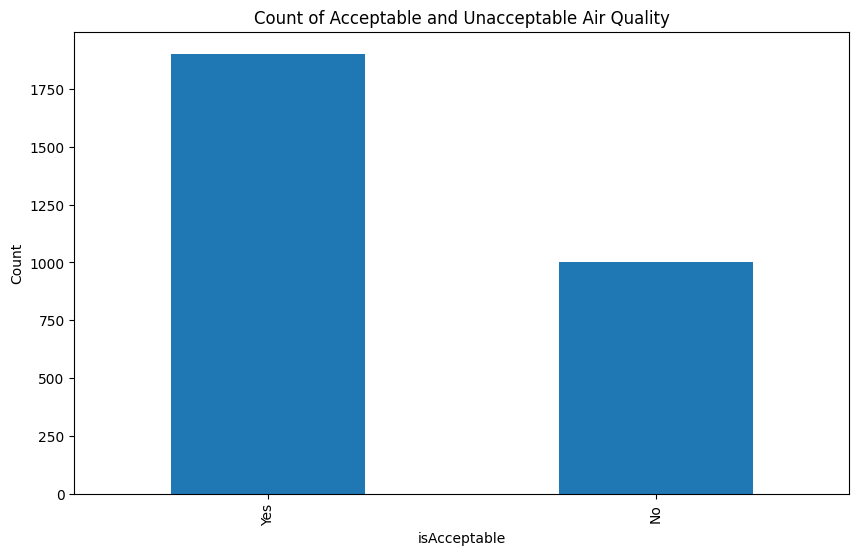

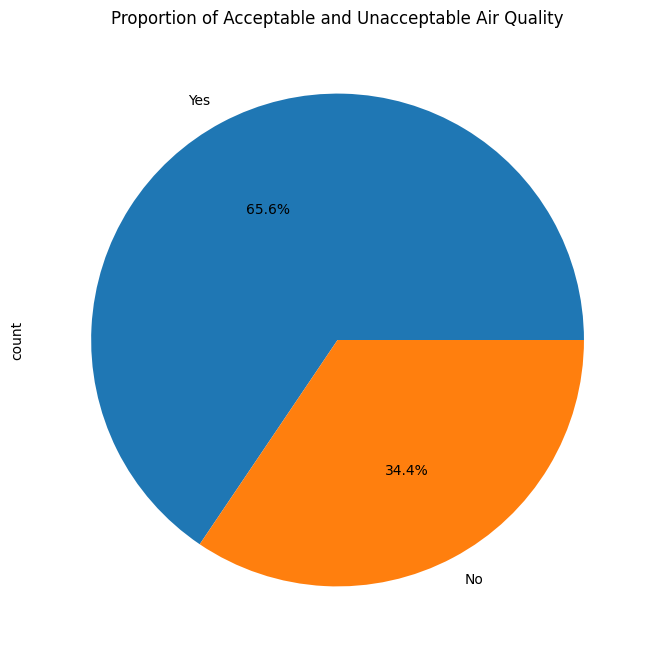

In [9]:
# Bar chart
plt.figure(figsize=(10, 6))
df['isAcceptable'].value_counts().plot(kind='bar')
plt.title('Count of Acceptable and Unacceptable Air Quality')
plt.xlabel('isAcceptable')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
df['isAcceptable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Acceptable and Unacceptable Air Quality')
plt.show()


In [10]:
# Removing rows with NaN values in 'pollutant_avg'
df_without_nan = df.dropna(subset=["pollutant_avg"])

# Dropping 'last_update' column since it's not useful for prediction
df_without_nan.drop(columns=["last_update"], inplace=True)

# One-Hot Encoding 'pollutant_id'
encoder = OneHotEncoder()
encoded_pollutant_id = encoder.fit_transform(df_without_nan[['pollutant_id']])
encoded_df = pd.DataFrame(encoded_pollutant_id.toarray(), columns=encoder.get_feature_names_out(['pollutant_id']))

# Concatenating the encoded features with the original DataFrame
df_without_nan.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df_without_nan, encoded_df], axis=1)
df_encoded.drop(columns=["pollutant_id"], inplace=True)
df_encoded.head()


C:\Users\Vaishali Thakur\AppData\Local\Temp\ipykernel_9004\875831954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan.drop(columns=["last_update"], inplace=True)


,country,state,city,station,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,isAcceptable,pollutant_id_CO,pollutant_id_NH3,pollutant_id_NO2,pollutant_id_OZONE,pollutant_id_PM10,pollutant_id_PM2.5,pollutant_id_SO2
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,2.0,4.0,3.0,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,21.0,24.0,22.0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,58.0,92.0,71.0,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",13.204880,79.097889,7.0,9.0,9.0,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",16.987287,81.736318,11.0,12.0,12.0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0


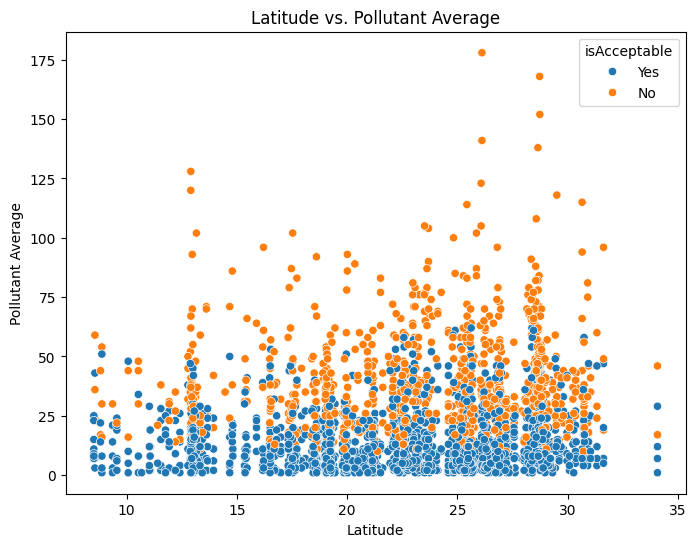

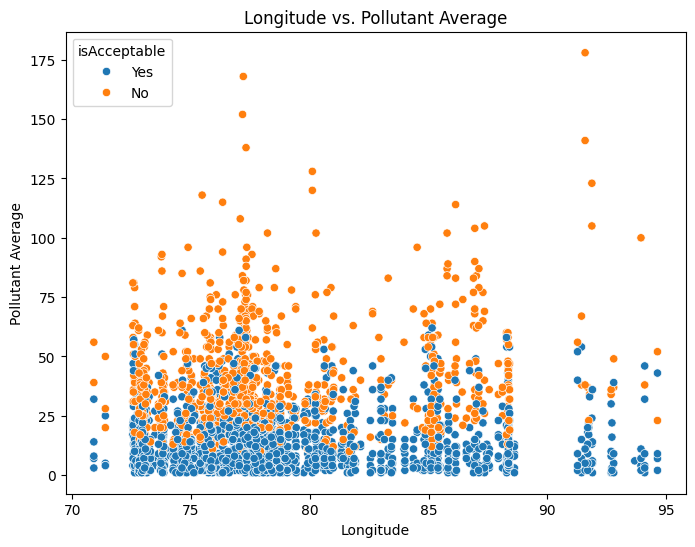

In [11]:
# Scatter plot for latitude vs. pollutant_avg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='pollutant_avg', hue='isAcceptable', data=df_encoded)
plt.title('Latitude vs. Pollutant Average')
plt.xlabel('Latitude')
plt.ylabel('Pollutant Average')
plt.show()

# Scatter plot for longitude vs. pollutant_avg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='pollutant_avg', hue='isAcceptable', data=df_encoded)
plt.title('Longitude vs. Pollutant Average')
plt.xlabel('Longitude')
plt.ylabel('Pollutant Average')
plt.show()


In [12]:
label_encoder = LabelEncoder()

# Columns to drop
not_needed_columns = ["country", "state", "city", "station", "isAcceptable"]

# Defining features (X) and target (y)
X = df_encoded.drop(columns=not_needed_columns)
y = label_encoder.fit_transform(df_encoded["isAcceptable"])

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN Model fitting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)


              precision    recall  f1-score   support

           0       0.72      0.71      0.71       190
           1       0.86      0.87      0.86       391

    accuracy                           0.82       581
   macro avg       0.79      0.79      0.79       581
weighted avg       0.81      0.82      0.82       581



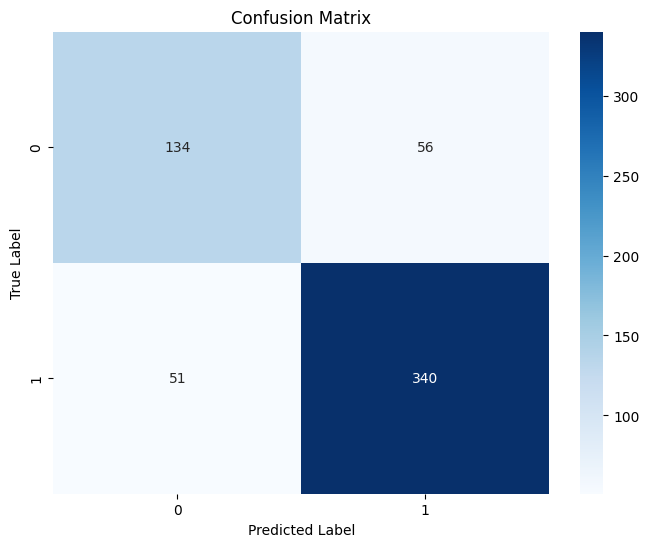

Accuracy: 0.8158347676419966
F1 Score: 0.8640406607369758


In [13]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy and F1 Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


In [14]:
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")


Best k value: 18


c:\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


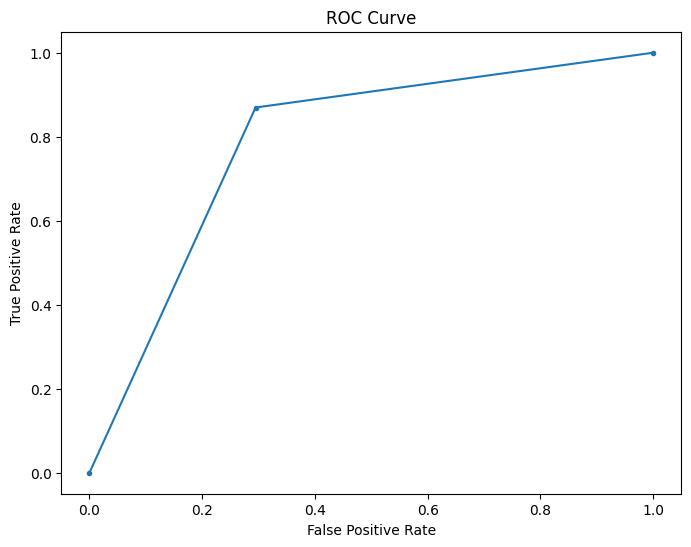

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
